<a href="https://colab.research.google.com/github/singhkhushi13/Ks13/blob/master/Preprocessing_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA PREPROCESSING

In [13]:
from google.colab import drive #import google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/data.zip #unzip data.zip

In [17]:
import tensorflow as tf #loading,reading and splitting training data
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    "/content/Alzheimer_s Dataset/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "/content/Alzheimer_s Dataset/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [18]:
test_ds = image_dataset_from_directory( #loading and reading testing data
    "/content/Alzheimer_s Dataset/test",
    labels = "inferred",
    label_mode = 'int',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1279 files belonging to 4 classes.


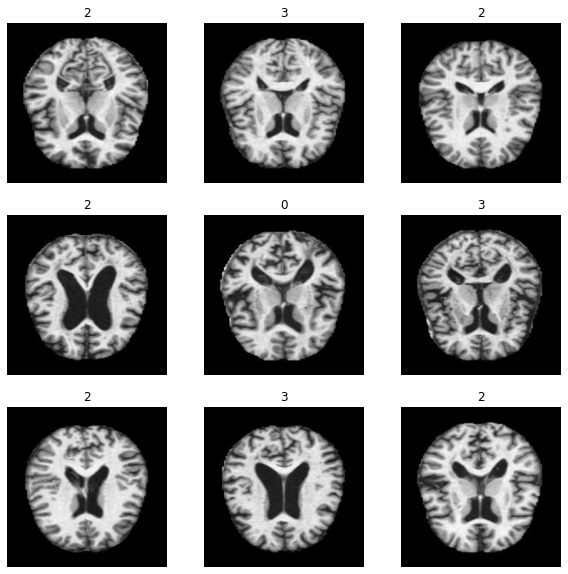

In [20]:
#visualizing the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
#Augmenting the above images using sequential method - result: too many layers, too slow, warnings
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [28]:
#Augmentation
from keras.models import Sequential
model = Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2,activation='softmax'))


CNN MODELS